<div style="text-align: center;">
    <h1>Modellerstellung für die Vorhersage von Hotelstornierungen</h1>
    <p><b>Name:</b> Tommi Jlassi</p>
    <p><b>Matrikelnummer:</b> XX</p>
    <p><b>Datum:</b> 28. August 2025</p>
    <p><b>Kurs:</b> Machine Learning</p>
</div>


<h2 style="color:black;font-family: 'Times New Roman', Times, serif;">Inhaltsverzeichnis</h2>
<ol style="color:black; line-height: 1.5;">
    <li><a href="#kapitel1" style="color:black;font-family: 'Times New Roman', Times, serif;">Betrachte das Gesamtbild</a></li>
    <li><a href="#kapitel2" style="color:black;font-family: 'Times New Roman', Times, serif;">Datenbeschaffung und Visualisierung</a></li>
    <li><a href="#kapitel3" style="color:black;font-family: 'Times New Roman', Times, serif;">Datenaufbereitung</a></li>
    <li><a href="#kapitel4" style="color:black;font-family: 'Times New Roman', Times, serif;">Modellierung und Bewertung</a></li>
    <li><a href="#kapitel5" style="color:black;font-family: 'Times New Roman', Times, serif;">Fazit</a></li>

</ol>


<a id="kapitel1" style="color:black"><h2>1. Betrachtung des Gesamtbilds</h2></a> 

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Die vorliegende Arbeit untersucht die Möglichkeiten, mithilfe von Datenanalyse und Machine Learning geschäftsrelevante Vorhersagen zu treffen. 
Im Mittelpunkt steht die Fragestellung, ob bevorstehende Hotelreservierungen storniert werden oder nicht, sowie die Wahrscheinlichkeit eines solchen Stornofalls. 
Eine verlässliche Prognose in diesem Bereich ist für Hotelbetreiber von großem Nutzen, da sie eine effizientere Personal- und Ressourcenplanung, gezielte Marketingmaßnahmen sowie die Reduzierung finanzieller Ausfälle ermöglicht.
</p>

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Ausgehend von diesem Ziel wird zunächst ein Gesamtüberblick der Daten vorgestellt, diese analysiert und für den Einsatz von Machine-Learning-Algorithmen aufbereitet. 
Im nächsten Schritt erfolgt die Auswahl der Daten, das Training und die Verfeinerung eines geeigneten Modells. 
Für diese Arbeit liegt der Fokus auf den Modellen <i>Random Forest</i> und <i>Linear Regression</i>. 
Sinnvoll wären auch weitere Verfahren wie beispielsweise <i>Support Vector Machines</i> oder <i>Gradient Boosting</i> zu erproben, um ein noch breiteres Bild der Vorhersageleistung zu erhalten. Für die vorliegende Arbeit wurde jedoch eine Eingrenzung auf die beiden genannten Modelle vorgenommen, da sie einerseits unterschiedliche methodische Ansätze repräsentieren und andererseits eine gute Balance zwischen Interpretierbarkeit und Prognosequalität versprechen. Abschließend werden die Ergebnisse präsentiert und die praktischen Einsatzmöglichkeiten diskutiert.
</p>


<a id="kapitel2" style="color:black"><h2>2. Datenbeschaffung</h2></a> 

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
<strong>Ziel:</strong> In diesem Kapitel werden die verwendeten Datenquellen vorgestellt sowie die Eigenschaften der Rohdaten beschrieben.
</p>

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Die für diese Arbeit verwendeten Daten stammen von der Plattform <i>Kaggle</i> und sind über den folgenden Datensatz zugänglich: 
<a href="https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction" target="_blank">Reservation Cancellation Prediction Dataset</a>. 
Es handelt sich um historische Buchungsdaten eines Hotels, die Angaben zu Reservierungen sowie deren Status (storniert oder nicht storniert) enthalten. 
Damit bilden sie die Grundlage für die Entwicklung und das Training von Machine-Learning-Modellen zur Vorhersage von Stornierungen.
</p>

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Der Datensatz enthält sowohl numerische als auch kategoriale Merkmale, beispielsweise Informationen zur Aufenthaltsdauer, zur Anzahl der Gäste, zum gebuchten Zimmertyp, zu Zahlungsbedingungen und zu Marketingkanälen. 
Diese Vielfalt an Attributen ermöglicht es, unterschiedliche Einflussfaktoren auf eine mögliche Stornierung zu analysieren und in die Modellbildung einzubeziehen. 
Die Daten liegen im CSV-Format vor und werden im Rahmen der Arbeit mit der Python-Bibliothek <i>pandas</i> importiert und weiterverarbeitet.
</p>


In [25]:
import pandas as pd
df = pd.read_csv("train_dataset.csv")


<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Die Daten werden nach dem Import zunächst mit verschiedenen Funktionen in Python gesichtet, um einen ersten Überblick zu erhalten. 
So können grundlegende Eigenschaften wie die Größe des Datensatzes, die enthaltenen Spalten, die Datentypen sowie die ersten Zeilen betrachtet werden. 
Dies dient dazu, ein besseres Verständnis für die Struktur der Daten zu entwickeln und mögliche Auffälligkeiten frühzeitig zu erkennen.
</p>


In [26]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [28]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000
mean,1.846777,0.107515,0.811104,2.208965,0.318465,0.031648,0.336770,85.377405,2017.820698,7.432762,15.660804,0.806197,0.025087,0.022440,0.151403,103.478868,0.617522,0.327618
std,0.516020,0.408901,0.873470,1.426365,0.629140,0.175066,0.772865,86.611736,0.383616,3.076999,8.772788,0.645972,0.156393,0.370078,1.714135,35.474103,0.787941,0.469357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.270000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


<a id="kapitel2_1" style="color:black"><h3>2.1 Eigenschaften des Datensatzes</h3></a> 

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Der Datensatz besteht aus insgesamt 18.137 Einträgen und umfasst 18 Merkmale. 
Es handelt sich um historische Hotelbuchungen, bei denen jeweils vermerkt ist, ob die Reservierung storniert wurde oder nicht. 
Die Zielgröße ist <span style="color:gray">booking_status</span>, wobei 1 eine Stornierung und 0 eine nicht stornierte Buchung kennzeichnet.
</p>

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Die Merkmale lassen sich in verschiedene Bereiche einteilen:
</p>

<ul style="line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
  <li><strong>Gäste und Aufenthalt:</strong> 
      <span style="color:gray">no_of_adults</span>, 
      <span style="color:gray">no_of_children</span>, 
      <span style="color:gray">no_of_weekend_nights</span>, 
      <span style="color:gray">no_of_week_nights</span>. 
      Diese Angaben beschreiben, wie viele Personen angereist sind und wie lange der Aufenthalt dauern sollte.</li>
      
  <li><strong>Buchungsdetails:</strong> 
      <span style="color:gray">type_of_meal_plan</span>, 
      <span style="color:gray">room_type_reserved</span>, 
      <span style="color:gray">market_segment_type</span>, 
      <span style="color:gray">required_car_parking_space</span>. 
      Hier werden unter anderem die Verpflegungsart, der gebuchte Zimmertyp sowie der Vertriebskanal festgehalten.</li>
      
  <li><strong>Vergangenheit des Gastes:</strong> 
      <span style="color:gray">repeated_guest</span>, 
      <span style="color:gray">no_of_previous_cancellations</span>, 
      <span style="color:gray">no_of_previous_bookings_not_canceled</span>. 
      Diese Merkmale zeigen, ob es sich um einen wiederkehrenden Gast handelt und wie sein bisheriges Buchungsverhalten aussah.</li>
      
  <li><strong>Zeitliche Angaben:</strong> 
      <span style="color:gray">lead_time</span>, 
      <span style="color:gray">arrival_year</span>, 
      <span style="color:gray">arrival_month</span>, 
      <span style="color:gray">arrival_date</span>. 
      Diese Variablen beziehen sich auf den Buchungszeitpunkt und den geplanten Anreisetermin.</li>
      
  <li><strong>Preis und Wünsche:</strong> 
      <span style="color:gray">avg_price_per_room</span>, 
      <span style="color:gray">no_of_special_requests</span>. 
      Sie geben Aufschluss über den Zimmerpreis und eventuelle Sonderwünsche der Gäste.</li>
</ul>




<a id="kapitel2_2" style="color:black"><h3>2.3 Deskriptive Analyse</h3></a> 







<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Für ein besseres Verständnis ist es hilfreich die Daten zu visualisieren. Hierfür wird ein Histogramm verwendet.
</p>


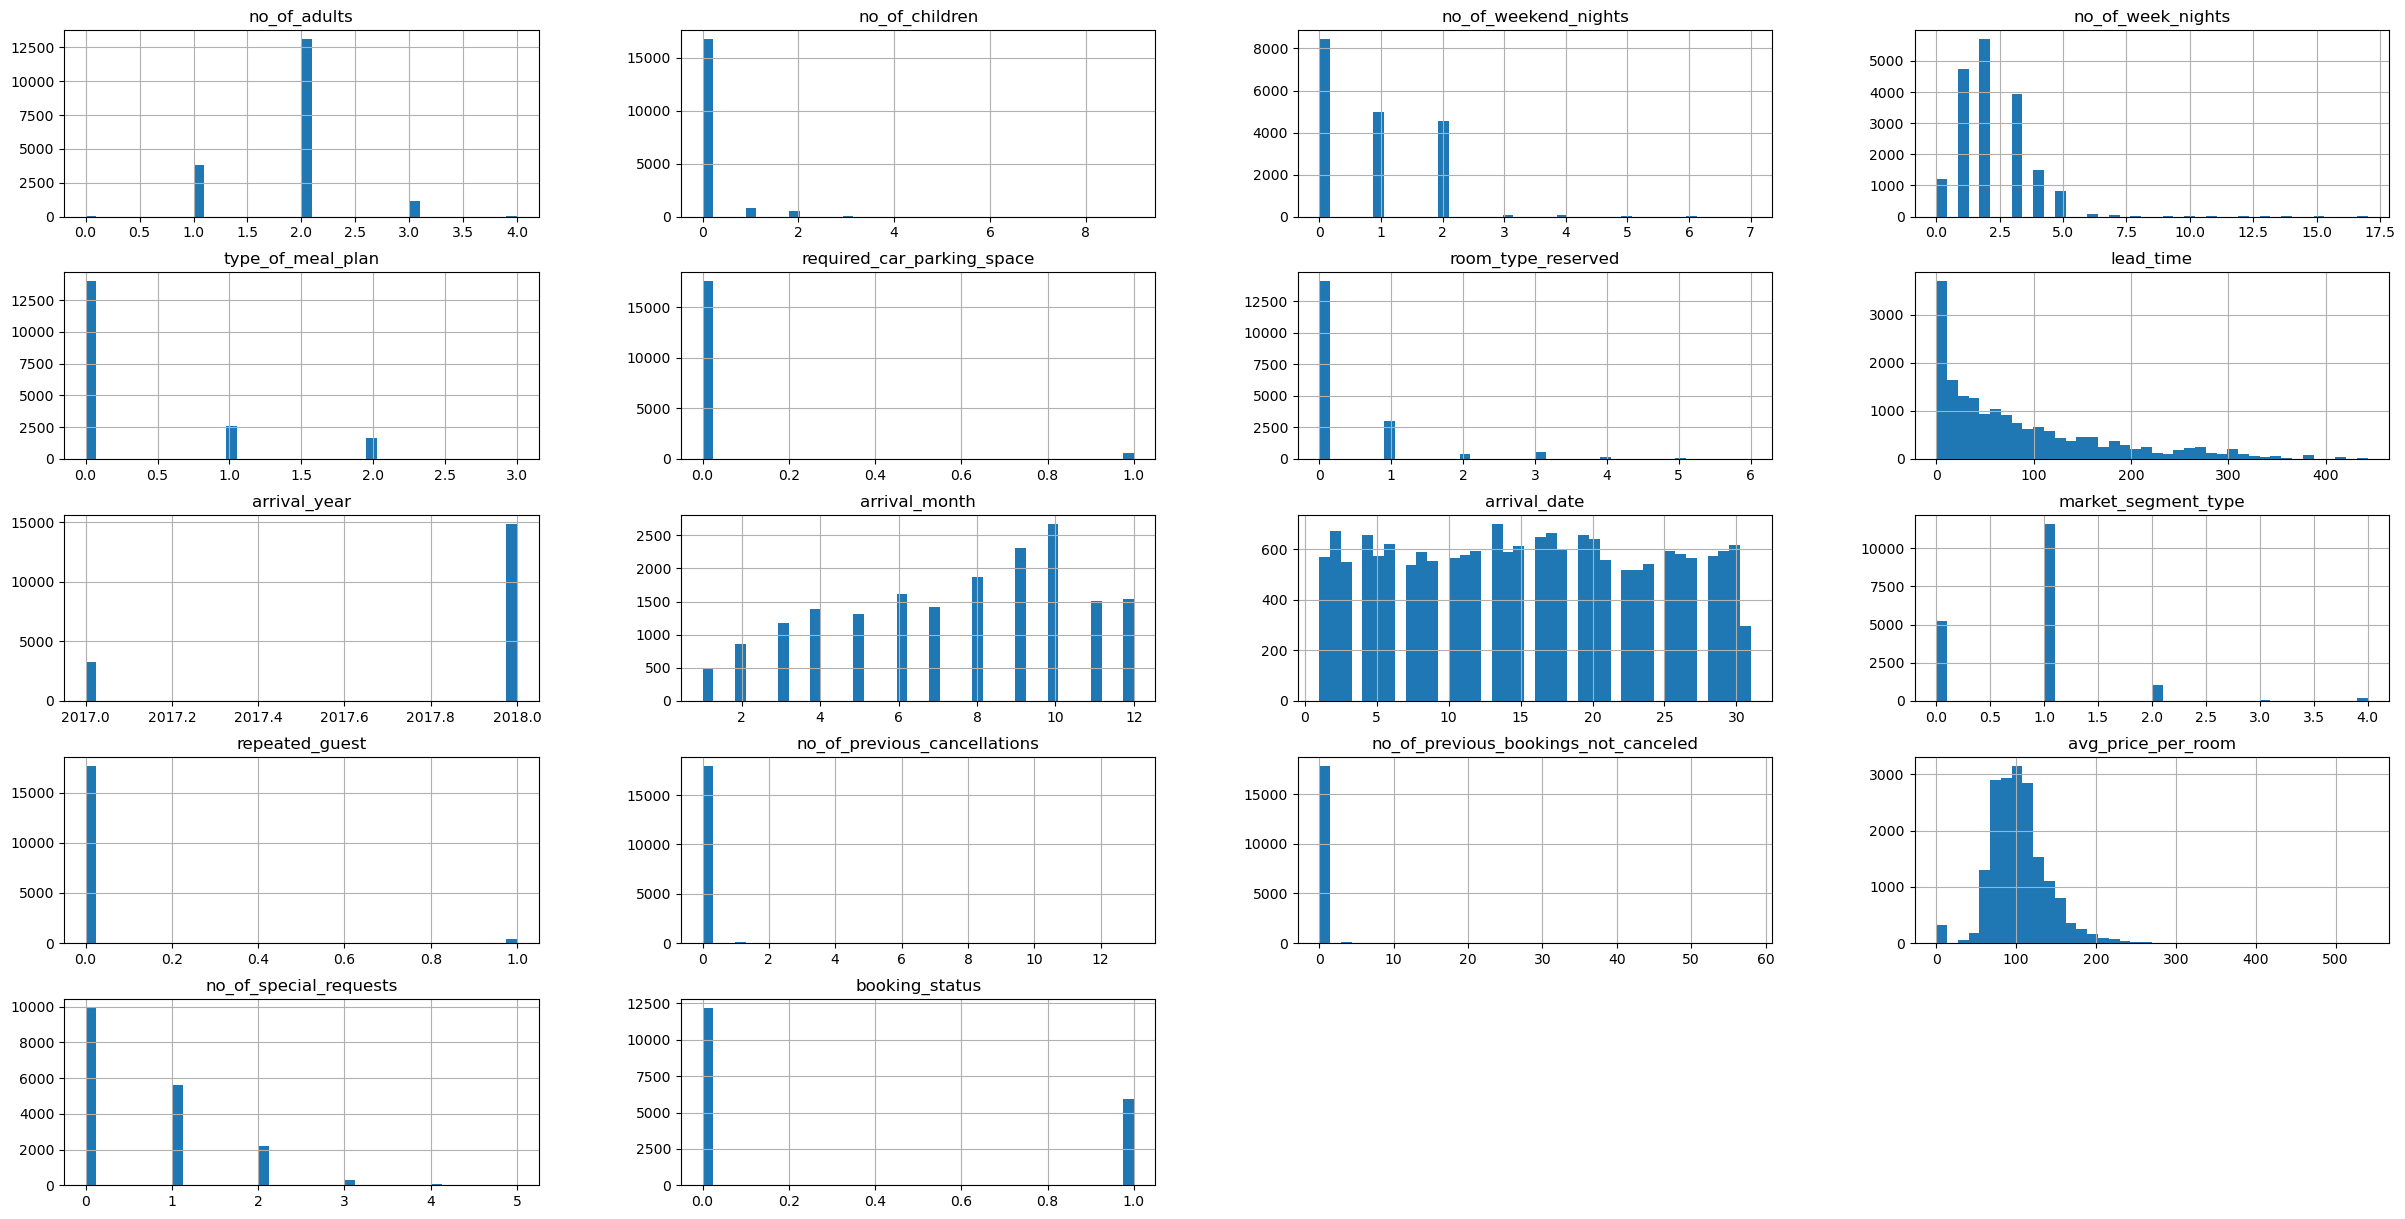

In [29]:
import matplotlib.pyplot as plt

df.hist(bins=40, figsize=(30,15))
plt.show()

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Die numerischen Merkmale, wie zum Beispiel <span style="color:gray">lead_time</span> oder <span style="color:gray">avg_price_per_room</span>, zeigen deutliche Unterschiede in ihrer Verteilung. 
Bei <span style="color:gray">lead_time</span> fällt eine stark rechtsschiefe Verteilung auf, was bedeutet, dass die meisten Buchungen kurzfristig erfolgen, während nur wenige Gäste sehr lange im Voraus reservieren. 
Das Merkmal <span style="color:gray">avg_price_per_room</span> liegt überwiegend in einem mittleren Bereich. 
Auffällig sind einige Werte mit 0, die entweder fehlerhaft erfasst wurden oder aber durch Sonderaktionen, Rabatte oder spezielle Marketingmaßnahmen entstanden sein könnten.
</p>

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Bei den kategorialen Merkmalen, wie <span style="color:gray">type_of_meal_plan</span>, <span style="color:gray">room_type_reserved</span> oder <span style="color:gray">market_segment_type</span>, zeigt sich, dass manche Kategorien deutlich häufiger vorkommen als andere. 
Am häufigsten scheint ein Standard-Zimmertyp gebucht worden zu sein, während spezielle Kategorien eher selten gewählt werden. 
Da der Datensatz keine genaue Erklärung der Kodierungen enthält, kann lediglich vermutet werden, dass die Kategorie 0 jeweils die Standardauswahl darstellt. 
Ähnlich verhält es sich bei den Verpflegungsarten, wo ein Basis- oder Standard-Plan dominiert.
</p>

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Besonders wichtig für die spätere Modellierung ist die Zielvariable <span style="color:gray">booking_status</span>. 
Der Datensatz umfasst sowohl stornierte als auch nicht stornierte Buchungen, allerdings nicht in gleicher Häufigkeit. 
Dieses Ungleichgewicht zwischen den beiden Klassen muss bei der Aufteilung in Trainings- und Testdaten berücksichtigt werden, damit die Modelle nicht einseitig lernen.
</p>

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Zusammenfassend lässt sich festhalten, dass der Datensatz sowohl numerische als auch kategoriale Merkmale enthält, die unterschiedliche Aspekte einer Hotelbuchung abbilden. 
Einige Variablen, wie <span style="color:gray">lead_time</span> oder <span style="color:gray">avg_price_per_room</span>, weisen Ausreißer und eine ungleichmäßige Verteilung auf. 
Bei den kategorialen Merkmalen dominieren bestimmte Kategorien, während andere nur selten vorkommen. 
Zudem zeigt die Zielvariable <span style="color:gray">booking_status</span>, dass ein Klassenungleichgewicht zwischen stornierten und nicht stornierten Buchungen besteht, was im weiteren Modellierungsprozess berücksichtigt werden muss.
</p>


<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Beim Merkmal <span style="color:gray">avg_price_per_room</span> sind einige Werte mit 0 aufgefallen. 
Da es sich hierbei vermutlich um fehlerhafte Einträge oder Sonderfälle handelt wurde wurde diese Zeilen vorerst entfernt. 
Der Datensatz wird dadurch zwar um 284 Buchungen kleiner, aber für die weitere Analyse ist ein Verlust von 1,57% vertretbar. 
Der mögliche Informationsverlust wird an dieser Stelle bewusst in Kauf genommen, um eine konsistente Datenbasis zu erhalten.
</p>


In [30]:
(df["avg_price_per_room"] == 0).sum()

np.int64(284)

In [31]:
df = df[df["avg_price_per_room"] != 0].copy()

<a id="kapitel3" style="color:black"><h2>3. Datenaufbereitung</h2></a> 

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
In diesem Kapitel werden die Daten für die weitere Arbeit vorbereitet. 
Ziel ist es, die Merkmale so zu strukturieren und zu verarbeiten, dass sie optimal für den Einsatz in Machine-Learning-Modellen genutzt werden können. 
Dazu gehört zunächst das Aufteilen des Datensatzes in Trainings- und Testdaten, um eine unabhängige Bewertung der Modelle zu ermöglichen. 
Darüber hinaus werden verschiedene Methoden ausprobiert, um die Daten zu bereinigen, zu transformieren und geeignete Features auszuwählen. 
Auf diese Weise entsteht ein besseres Verständnis dafür, wie die Daten beschaffen sind und wie sie für die Modellierung am sinnvollsten eingesetzt werden können.
</p>


In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["booking_status"])   # Features
y = df["booking_status"]                  # Zielvariable

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, stratify=df["booking_status"], random_state=42)


In [33]:
corr_view = Xtrain.copy()

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Für einige Merkmale wurde sich entschieden, diese in binärer Form darzustellen. 
Dazu gehören <span style="color:gray">no_of_weekend_nights</span>, <span style="color:gray">no_of_previous_cancellations</span>, <span style="color:gray">no_of_children</span> und <span style="color:gray">room_type_reserved</span>. 
Der Gedanke dahinter ist, dass die genaue Anzahl in diesen Variablen oft weniger wichtig ist, sondern eher, ob das Merkmal überhaupt vorkommt oder nicht. 
Es reicht also zu wissen, dass Kinder mitreisen, während die genaue Anzahl wahrscheinlich keinen großen Unterschied macht. 
Mit der binären Darstellung wird dies einfach abgebildet: 0 bedeutet nicht vorhanden und 1 bedeutet vorhanden.
</p>



In [34]:
def binarize_features(df, columns):
    df = df.copy()
    for col in columns:
        if col in df.columns:
            df["n_" + col] = (df[col] > 0).astype(int)
        else:
            print(f"{col} nicht gefunden")
    return df

In [35]:
corr_view=binarize_features(corr_view, ["no_of_weekend_nights","no_of_previous_cancellations","no_of_children","room_type_reserved"])

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Neben der binären Darstellung einzelner Merkmale wurde sich auch entschieden, bestimmte Variablen in Gruppen zusammenzufassen. 
Der Gedanke dahinter ist, dass sehr kleine Randgruppen („marginale Gruppen“) leicht ein statistisches Bias erzeugen können, wenn sie in den Daten zu selten vorkommen. 
So wird <span style="color:gray">no_of_special_requests</span> in drei Stufen eingeteilt (0, 1 und 2–4), damit die Verteilung stabiler wird. 
Auch <span style="color:gray">market_segment_type</span> wird auf drei Gruppen reduziert, um zu vermeiden, dass sehr seltene Kategorien das Modell verzerren. 
Das Merkmal <span style="color:gray">arrival_month</span> wird nach Jahreszeiten gruppiert, wodurch saisonale Muster klarer sichtbar werden. 
Diese Anpassungen sollen die Daten robuster machen und eine bessere Grundlage für die Modellierung schaffen.
</p>



In [36]:
import numpy as np

corr_view["n_cut_special_request"] = pd.cut(corr_view["no_of_special_requests"],  bins=[-0.5,0.5,1.5,np.inf], labels=[0,1,2]).astype(int)

# 0 | 1 | 2-4
corr_view["n_market_segment_bin"] = pd.cut(corr_view["market_segment_type"],bins=[-0.5, 0.5, 1.5, np.inf],labels=[0, 1, 2],include_lowest=True).astype(int)

# Winter, Frühling, Sommer, Herbst, Winter # 5 Intervalle → 5 Labels
corr_view["n_arrival_season"] = pd.cut(corr_view["arrival_month"],bins=[0,3,6,9,12],labels=[1, 2, 3, 4],include_lowest=True).astype(int)


<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Beim Merkmal <span style="color:gray">avg_price_per_room</span> wurde sich entschieden, eine logaritmische Transformation auf der Basis 10 zu machen. 
Der Hintergrund ist, dass die Werte sehr ungleich verteilt sind und ein paar extrem hohe Preise vorkommen. 
Durch die logarithmische Darstellung wird die Verteilung ausgeglichener und die Ausreißer fallen nicht mehr so stark ins Gewicht. 
Damit sollen die Modelle später einfacher mit den Daten arbeiten können.
</p>


In [37]:
#Entlastung avg_price_per_room
corr_view["n_avg_price_per_room"] = np.log10(corr_view["avg_price_per_room"])

In [38]:
#Bucketizing
corr_view["n_lead_time"] = pd.cut(corr_view["lead_time"],bins=[-0.5, 7, 30, 90, np.inf],labels=[0, 1, 2, 3]).astype(int)

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Im nächsten Schritt wurden die Korrelationen berechnet, um zu prüfen, welche Merkmale einen Zusammenhang mit der Zielvariable <span style="color:gray">booking_status</span> aufweisen. 
Auf dieser Grundlage wurde entschieden, für die weitere Arbeit nur die Merkmale mitzunehmen, die einen erkennbaren Einfluss haben könnten. 
Dadurch wurden schwächere Variablen frühzeitig herausgefiltert und die Datenbasis für die Modellierung übersichtlicher gestaltet.
</p>

In [39]:
corr_view["booking_status"] = ytrain
corr_matrix = corr_view.select_dtypes(include=["number"]).corr()
corr_matrix["booking_status"].sort_values(ascending=False)

booking_status                          1.000000
lead_time                               0.425968
n_lead_time                             0.360958
arrival_year                            0.178806
n_avg_price_per_room                    0.135950
avg_price_per_room                      0.123786
no_of_week_nights                       0.095746
no_of_adults                            0.087191
type_of_meal_plan                       0.076321
no_of_weekend_nights                    0.049710
n_no_of_weekend_nights                  0.039199
no_of_children                          0.030014
n_room_type_reserved                    0.028772
room_type_reserved                      0.026241
n_no_of_children                        0.024913
arrival_date                            0.010159
n_arrival_season                        0.006279
n_market_segment_bin                    0.000050
market_segment_type                    -0.002916
arrival_month                          -0.006066
no_of_previous_cance

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Aus den berechneten Korrelationen wurde ersichtlich, dass vor allem <span style="color:gray">lead_time</span> mit einem Wert von rund 0,43 den stärksten positiven Zusammenhang mit <span style="color:gray">booking_status</span> aufweist. 
Ebenfalls ein erkennbarer, wenn auch schwächerer, Zusammenhang wurde bei <span style="color:gray">arrival_year</span> sowie bei den Preisvariablen festgestellt. 
Ein negativer Zusammenhang zeigte sich dagegen insbesondere bei <span style="color:gray">no_of_special_requests</span> und <span style="color:gray">repeated_guest</span>, was darauf hinweist, dass Gäste mit Sonderwünschen oder wiederkehrende Gäste eher weniger stornieren. 
Viele andere Variablen wiesen dagegen nur geringe oder nahezu keine Korrelationen auf und wurden daher als weniger relevant eingestuft.
</p>


In [40]:

corr_view = corr_view[["n_lead_time",
                       "n_avg_price_per_room",
                       "n_no_of_weekend_nights",
                       "n_room_type_reserved",
                       "n_no_of_children",
                       "n_arrival_season",
                       "n_market_segment_bin",
                       "n_cut_special_request",
                       "booking_status"]]
                

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Für die Übersicht wurden an dieser Stelle nur die neu erzeugten Merkmale betrachtet. 
Wie bereits zuvor beschrieben, wurden einige Variablen verändert oder zusammengefasst, auch wenn dadurch die Korrelation mit <span style="color:gray">booking_status</span> etwas geringer ausfällt. 
Dies wurde bewusst in Kauf genommen, da die veränderten Merkmale statistisch robuster sind und weniger anfällig für Verzerrungen durch kleine Randgruppen oder Ausreißer. 
Die geringere Korrelation wird daher akzeptiert, wenn im Gegenzug eine stabilere Basis für die Modellierung geschaffen wird.
</p>


In [41]:
corr_matrix = corr_view.select_dtypes(include=["number"]).corr()
corr_matrix["booking_status"].sort_values(ascending=False)

booking_status            1.000000
n_lead_time               0.360958
n_avg_price_per_room      0.135950
n_no_of_weekend_nights    0.039199
n_room_type_reserved      0.028772
n_no_of_children          0.024913
n_arrival_season          0.006279
n_market_segment_bin      0.000050
n_cut_special_request    -0.253527
Name: booking_status, dtype: float64

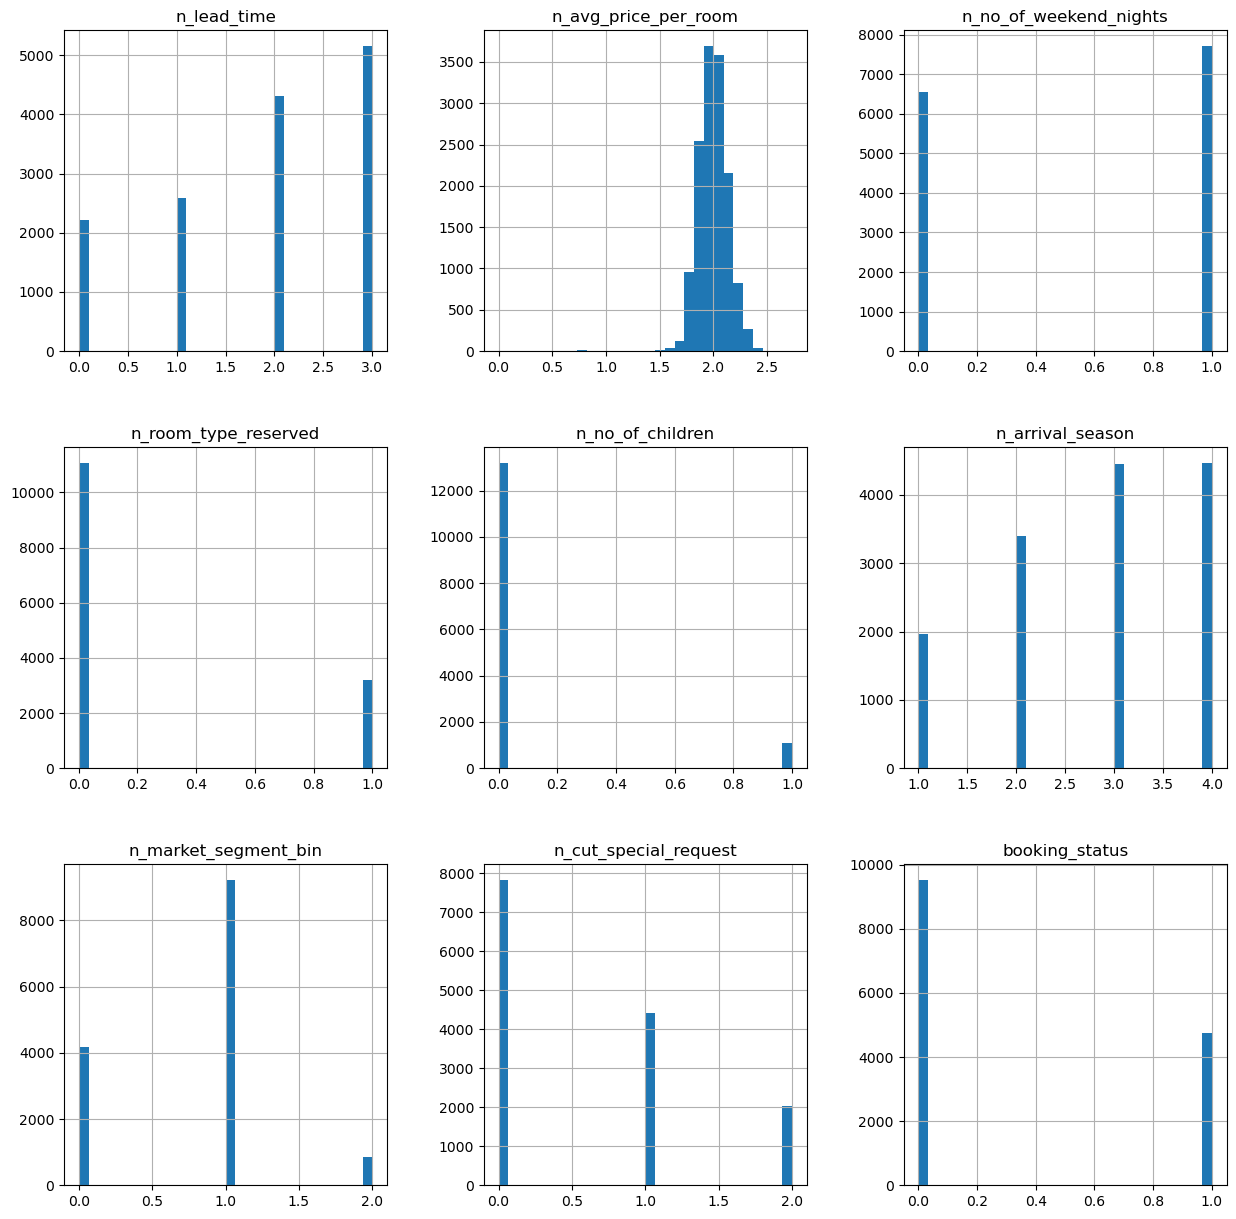

In [42]:
corr_view.hist(bins=30, figsize=(15,15))
plt.show()

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Für die Auswahl der Merkmale zur folgenden Modellierung wurde sich entschieden, nur einige wenige Variablen weiterzunutzen. 
<span style="color:gray">lead_time</span> hat die höchste Korrelation mit der Zielvariablen und bleibt daher erhalten. 
<span style="color:gray">arrival_year</span> wurde ausgeschlossen, da die hohe Korrelation vermutlich nur darauf zurückzuführen ist, dass im Datensatz lediglich zwei Jahre enthalten sind und somit ein Bias entstehen könnte. 
<span style="color:gray">avg_price_per_room</span> bleibt bestehen, da in Kombination mit anderen Variablen möglicherweise ein stärkerer Zusammenhang sichtbar wird. 
Auch <span style="color:gray">no_of_week_nights</span> und <span style="color:gray">no_of_adults</span> wurden mit aufgenommen. 
Auf der negativen Seite zeigt <span style="color:gray">no_of_special_requests</span> einen klaren Zusammenhang und wird ebenfalls weitergeführt, auch wenn eine binäre Variante keine Verbesserung gebracht hat, gerade für baumbasierte Modelle könnte dies später hilfreich sein. 
<span style="color:gray">repeated_guest</span> und <span style="color:gray">required_car_parking_space</span> weisen zwar ebenfalls eine deutliche negative Korrelation auf, wurden jedoch nicht berücksichtigt, da nur sehr wenige Beobachtungen vorhanden sind und dadurch ein Bias entstehen könnte.
</p>


<a id="kapitel4" style="color:black"><h2>4. Modellierung</h2></a> 

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Nachdem die Daten aufbereitet und die relevanten Merkmale ausgewählt wurden, folgt nun die eigentliche Modellierung. 
In diesem Kapitel werden verschiedene Machine-Learning-Modelle angewendet, um Vorhersagen über die Zielvariable <span style="color:gray">booking_status</span> zu treffen. 
Zunächst werden die ausgewählten Modelle vorgestellt und begründet, warum diese für das Problem geeignet erscheinen. 
Im Anschluss werden die Modelle mit den Trainingsdaten trainiert und ihre Ergebnisse mit Hilfe geeigneter Metriken bewertet. 
Die Testdaten, die bislang bewusst zurückgehalten wurden, kommen dabei erst am Ende zum Einsatz, um eine faire und unverfälschte Beurteilung der Modellleistung zu gewährleisten.
</p>

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Da im nächsten Teil alle Schritte von Beginn an erstellt und mit einer Pipeline umgesetzt werden, wurde wieder mit dem ursprünglichen Datensatz gestartet. 
So wird sichergestellt, dass alle Verarbeitungsschritte, vom Einlesen der Rohdaten über die Transformation der Merkmale bis hin zur Modellierung, vollständig in der Pipeline enthalten sind. Dadurch können die Daten später direkt übernommen und verarbeitet werden, ohne dass zusätzliche manuelle Zwischenschritte notwendig sind.
</p>


In [43]:
df = pd.read_csv("train_dataset.csv")

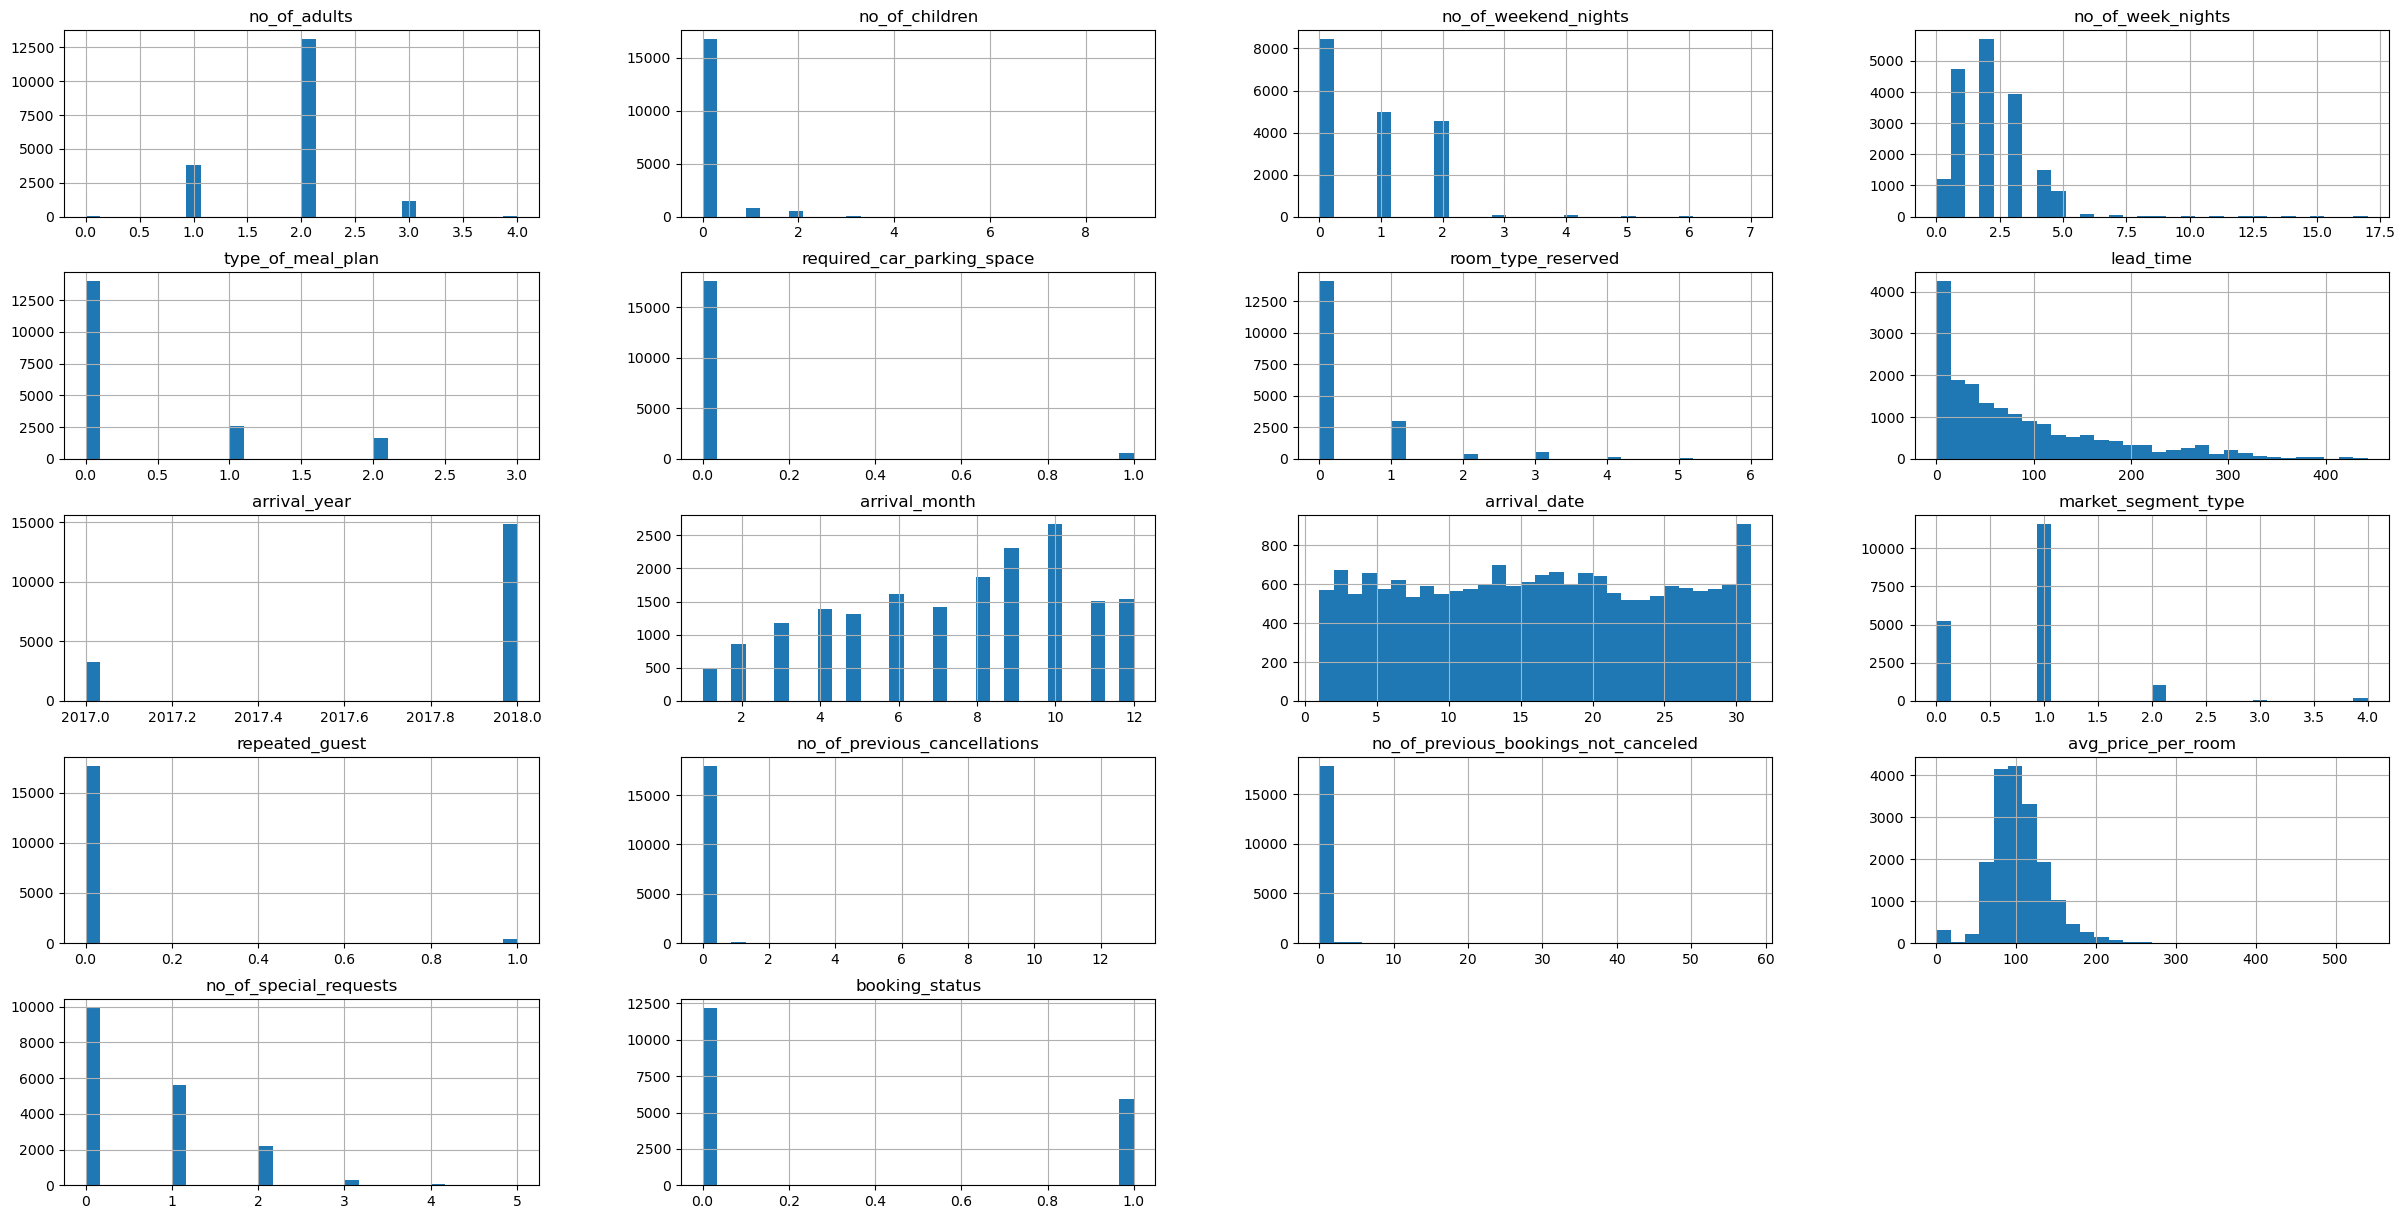

In [44]:
df.hist(bins=30, figsize=(30,15))
plt.show()

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Es wurde sich für die Transformation von <span style="color:gray">lead_time</span> mit der Box-Cox-Transformation entschieden, weil sie im Gegensatz zur einfachen Log-Transformation flexibler ist. 
Box-Cox sucht automatisch nach einem passenden Parameter, mit dem die Verteilung möglichst normalförmig gemacht wird. 
Damit lassen sich starke Schiefen in den Daten besser ausgleichen, was später für viele Modelle von Vorteil ist. 
Da Box-Cox nur mit positiven Werten arbeitet, wurden die Werte vorher um 1 erhöht, damit auch Nullwerte berücksichtigt werden können.
</p>



In [45]:
df = df[df["avg_price_per_room"] != 0].copy()
df["lead_time"] = df["lead_time"].replace(0, 1)

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Für die Pipeline wurden eigene kleine Funktionen erstellt, die bestimmte Merkmale automatisch umwandeln. 
Dazu gehört zum Beispiel das binäre Abbilden von Werten größer als null, das Zusammenfassen der Sonderwünsche in drei Gruppen, 
die Einteilung der Marktsegmente in Kategorien sowie die Gruppierung der Monate in Jahreszeiten. 
Mit diesen Funktionen können die Rohdaten später direkt in die Pipeline gegeben werden und werden dort automatisch in die gewünschte Form gebracht.
</p>


In [46]:

def binarize_df(X):
    if isinstance(X, pd.DataFrame):
        return (X > 0).astype(int)
    return (X > 0).astype(int)

def cut_special_request(X):
    s = pd.Series(pd.DataFrame(X).iloc[:, 0])  
    out = pd.cut(s, bins=[-0.5, 0.5, 1.5, np.inf], labels=[0,1,2]).astype(int)
    return out.to_numpy().reshape(-1, 1)

def cut_market_segment(X):
    s = pd.Series(pd.DataFrame(X).iloc[:, 0])
    out = pd.cut(s, bins=[-0.5, 0.5, 1.5, np.inf], labels=[0,1,2], include_lowest=True).astype(int)
    return out.to_numpy().reshape(-1, 1)

def cut_arrival_season(X):
    s = pd.Series(pd.DataFrame(X).iloc[:, 0])
    out = pd.cut(s, bins=[0,3,6,9,12], labels=[1,2,3,4], include_lowest=True).astype(int)
    return out.to_numpy().reshape(-1, 1)


<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Für die Modellierung wurde eine Pipeline aufgebaut, die alle Schritte der Datenverarbeitung automatisch abbildet. 
Dazu zählen die binäre Darstellung ausgewählter Merkmale, das Zusammenfassen seltener Ausprägungen in Gruppen sowie One-Hot-Encoding und Skalierung. 
Für <span style="color:gray">avg_price_per_room</span> wird eine log1p-Transformation genutzt und <span style="color:gray">lead_time</span> wird mit einer Box-Cox-Transformation stabilisiert. So können die Rohdaten direkt in die Pipeline gegeben werden und liegen anschließend in einer konsistenten Form für das Training vor.
</p>


In [47]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, PowerTransformer


#transit_attribs = ["lead_time"]

# zu binäre Attribute 
bin_attribs = [   "no_of_children",
                  "required_car_parking_space",
                  "type_of_meal_plan"
                  ]

# Kategorische Attribute (werden one-hot encodiert)
cat_attribs = [
   "no_of_weekend_nights",
    "room_type_reserved"
    ]

# Numerische Attribute (werden skaliert)
log_scale_attribs = ["avg_price_per_room"]


# Box-Cox Transformation für lead_time
leadtime_pipeline = Pipeline([
    ("boxcox", PowerTransformer(method="box-cox", standardize=True))
])


cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])


bin_pipeline = Pipeline([
    ("bin", FunctionTransformer(binarize_df, validate=False, feature_names_out="one-to-one"))
])

log_scale_pipeline = Pipeline([
    ("log", FunctionTransformer(np.log1p, validate=False, feature_names_out="one-to-one")),
    ("scaler", StandardScaler())
])


special_req_pipeline = Pipeline([
    ("cut_request",FunctionTransformer(cut_special_request, validate=False,feature_names_out="one-to-one")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
]) 


market_segment_pipeline =Pipeline([
("cut_segment",FunctionTransformer(cut_market_segment, validate=False,feature_names_out="one-to-one")),
("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
]) 


arrival_season_pipeline =Pipeline([
("cut_season",FunctionTransformer(cut_arrival_season, validate=False,feature_names_out="one-to-one")),
("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
]) 


# zusammenfügen aller Pipelines 
preprocess = ColumnTransformer([
    ("cut_request", special_req_pipeline, ["no_of_special_requests"]),
    ("cut_segment", market_segment_pipeline, ["market_segment_type"]),
    ("cut_season", arrival_season_pipeline, ["arrival_month"]),
    ("bin", bin_pipeline, bin_attribs,),
    ("cat", cat_pipeline, cat_attribs),
    ("log_scale", log_scale_pipeline, log_scale_attribs),
    ("leadtime", leadtime_pipeline, ["lead_time"]),
    
 ])

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Nach dem Aufbau der Pipeline wurden die Daten damit verarbeitet und in ein neues DataFrame überführt. 
So liegen nun alle Merkmale in der transformierten Form vor, die für die Modellierung benötigt werden. 
Über get_feature_names_out() wurden zudem die neuen Spaltennamen automatisch erzeugt, sodass die Übersicht über die Features erhalten bleibt.
</p>


In [48]:
hoteldata_prepared = pd.DataFrame(
    preprocess.fit_transform(df),
    index=df.index,
    columns=preprocess.get_feature_names_out()
)

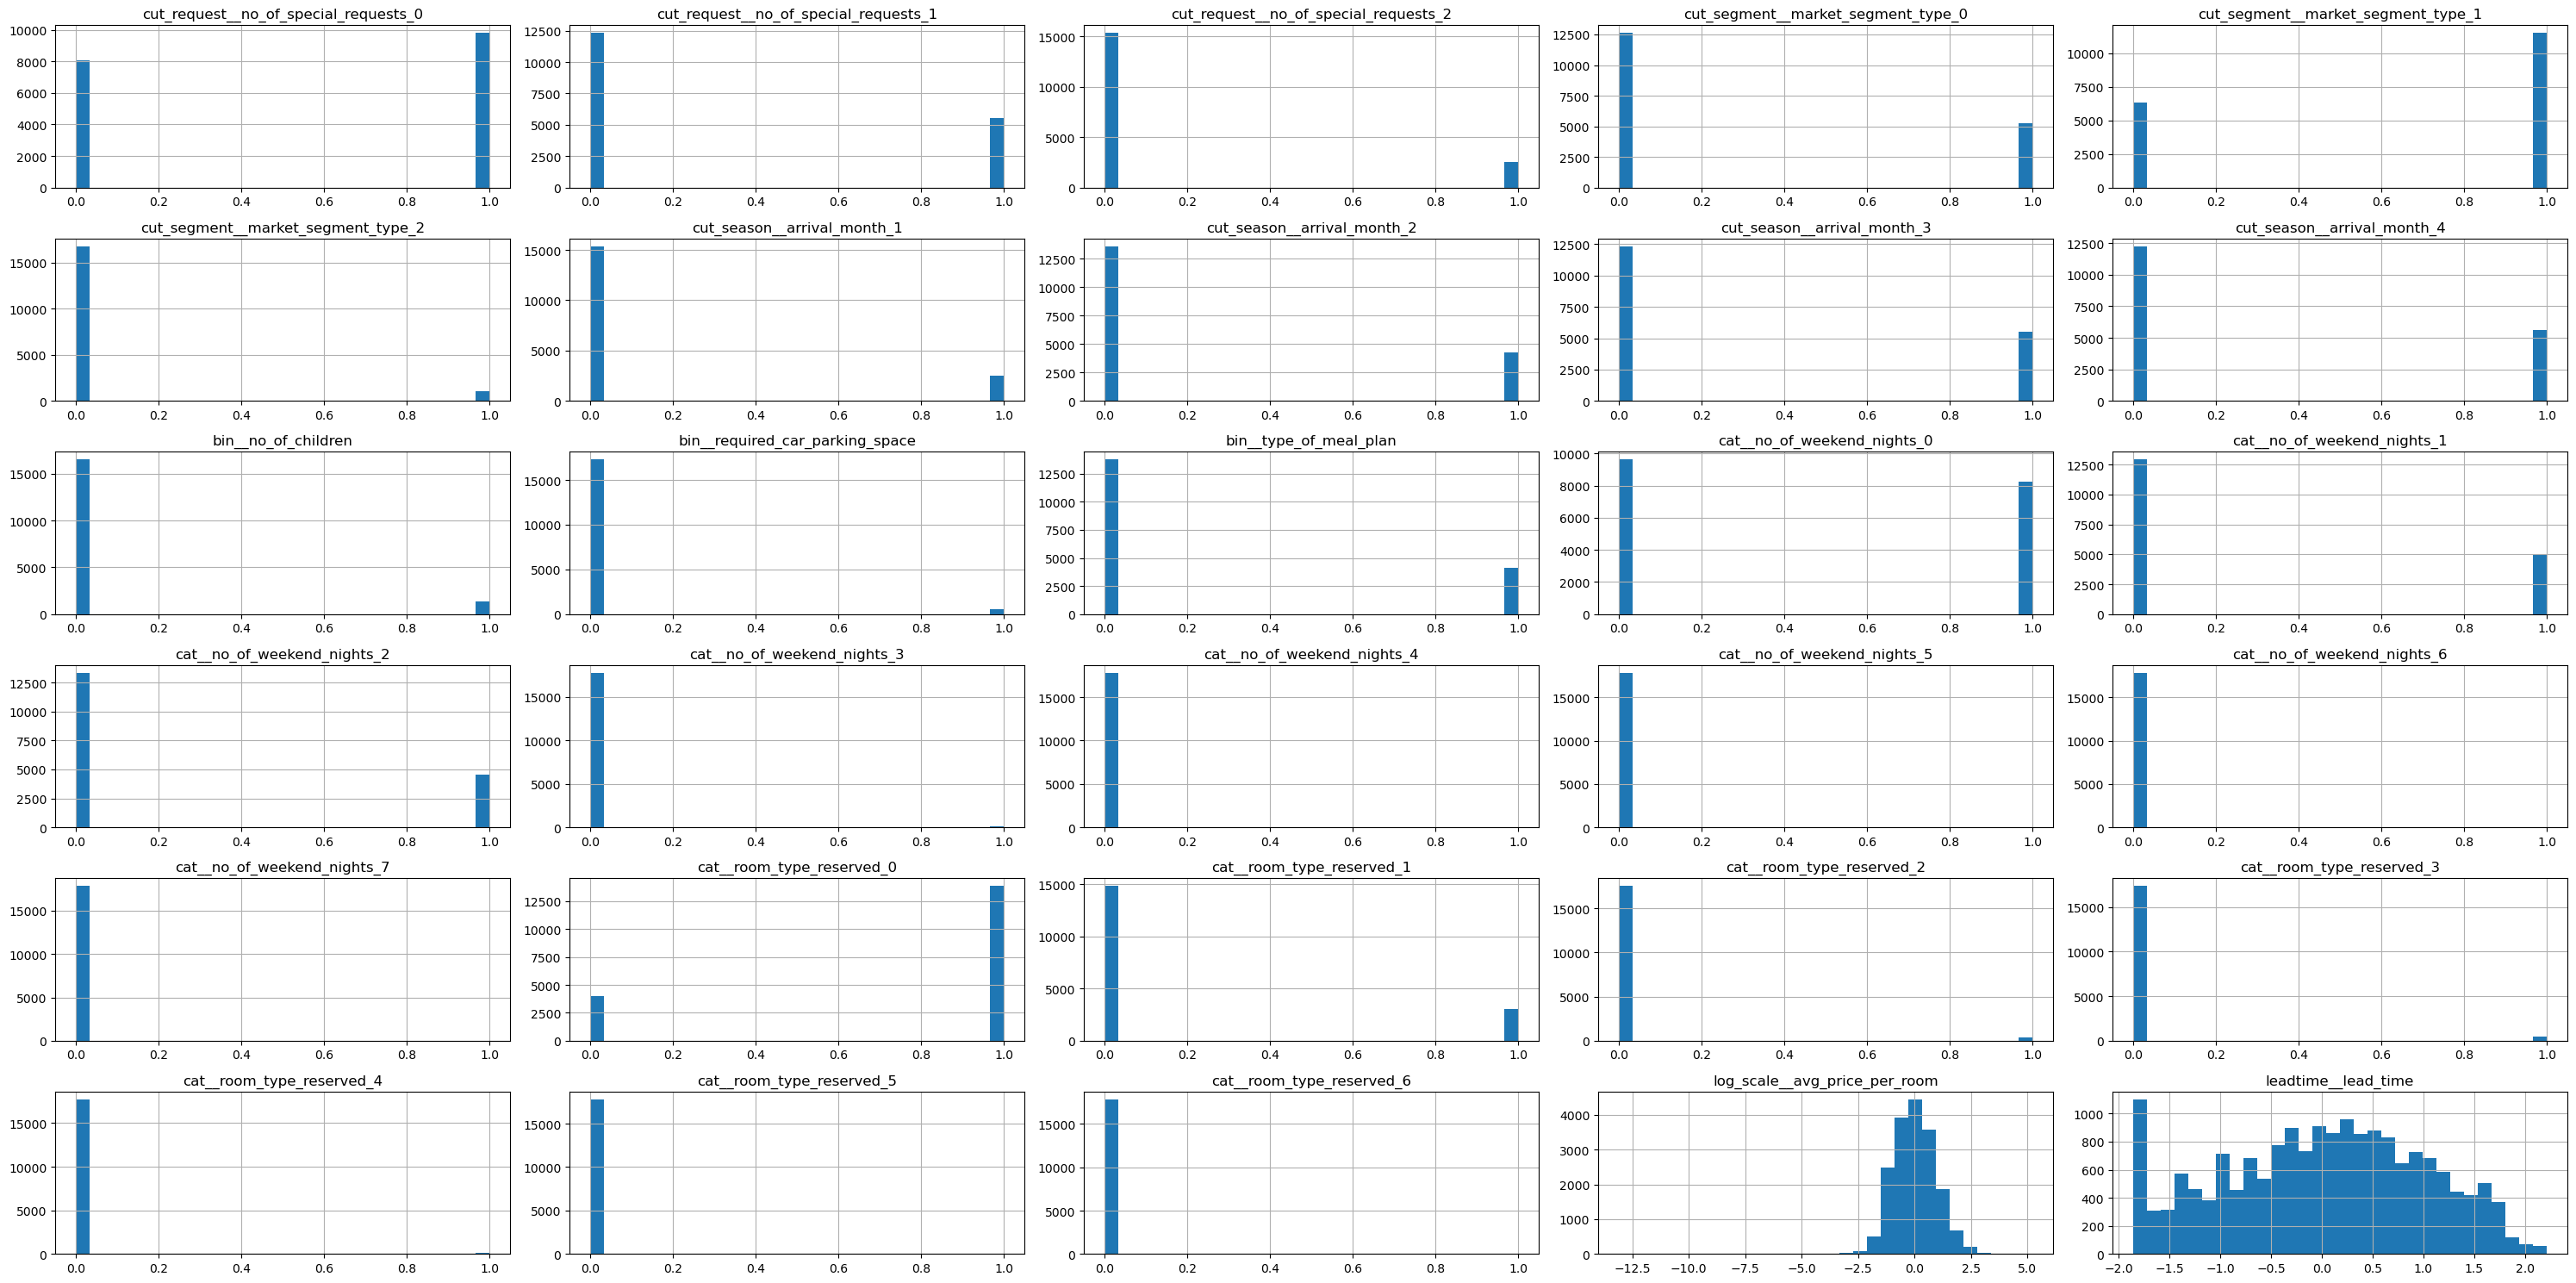

In [49]:
hoteldata_prepared.hist(bins=30, figsize=(30,15))

plt.tight_layout()
plt.show()

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Anschließend wurde der aufbereitete Datensatz in Merkmale X und Zielvariable y getrennt und in Trainings- und Testdaten aufgeteilt. 
Dabei wurde stratify genutzt, um die ursprüngliche Klassenverteilung beizubehalten, da im Datensatz ein Ungleichgewicht zwischen stornierten und nicht stornierten Buchungen vorliegt.
</p>


In [50]:

X = hoteldata_prepared.copy()
y = df["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


<a id="kapitel4_2" style="color:black"><h3>4.2 Random Forest</h3></a> 

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Als Grundlage für den Random Forest dienen Entscheidungsbäume. 
Ein Entscheidungsbaum arbeitet, indem er die Daten Schritt für Schritt anhand von Merkmalen aufteilt. 
Bei jedem Knoten im Baum wird eine Entscheidungsregel angewendet, zum Beispiel ob der Wert eines Merkmals größer oder kleiner als ein bestimmter Schwellenwert ist. 
So entstehen Verzweigungen, bis am Ende Blätter erreicht werden, die eine Vorhersage enthalten, etwa ob eine Buchung storniert wird oder nicht.
</p>

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Ein einzelner Entscheidungsbaum hat jedoch den Nachteil, dass er sehr stark an die Trainingsdaten angepasst sein kann und dadurch leicht überfittet. 
Der Random Forest setzt genau hier an, indem er viele verschiedene Entscheidungsbäume kombiniert. 
Jeder Baum erhält dabei nur eine zufällige Auswahl an Daten und Merkmalen, wodurch eine gewisse Vielfalt entsteht. 
Die Ergebnisse der einzelnen Bäume werden am Ende zusammengeführt, meist durch Mehrheitsabstimmung. 
Auf diese Weise werden zufällige Schwankungen ausgeglichen und das Modell insgesamt robuster und verlässlicher.
</p>


<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Für die Auswertung der Modelle wurde eine eigene Funktion erstellt, die einheitlich bei allen Tests eingesetzt wird. 
Dabei wird ausschließlich auf den Trainingsdaten mit Cross-Validation gearbeitet, um erste Kennzahlen wie Precision, Recall, F1-Score und ROC-AUC zu erhalten. 
Die Testdaten werden bewusst noch nicht verwendet, damit diese bis zum Schluss für eine unverfälschte Bewertung der endgültigen Modelle zurückgehalten werden.
</p>


In [51]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

def evaluate_model(model, X_train, y_train, optimierung):
    
    # 1. Cross-Validation (nur auf Training!)
    y_train_pred = cross_val_predict(model, X_train, y_train, cv=3, method="predict")
    y_train_proba = cross_val_predict(model, X_train, y_train, cv=3, method="predict_proba")[:, 1]
    print(optimierung)
    print(classification_report(y_train, y_train_pred))
    print("ROC-AUC (train):", roc_auc_score(y_train, y_train_proba))

    cm = confusion_matrix(y_train, y_train_pred)
    print(cm)

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Als erstes Modell wurde ein einfacher Random Forest mit zufälligen Parametern erstellt. 
Verwendet wurden dabei 100 Bäume und eine maximale Tiefe von 10 Ebenen. 
Das Modell wurde anschließend mit den Trainingsdaten trainiert und über die zuvor definierte Funktion mit Cross-Validation ausgewertet. 
Dieses Basis-Modell dient als Ausgangspunkt, um eine erste Einschätzung der Modellleistung zu bekommen und die späteren Optimierungen daran messen zu können.
</p>


In [52]:
from sklearn.ensemble import RandomForestClassifier

# Modell erstellen
forest_clf_basis = RandomForestClassifier(
    n_estimators=100,       # Anzahl Bäume
    max_depth=10,           #Anzahl der Ebenen
    random_state=42,        # Zufallsseed
)

#Training
forest_clf_basis.fit(X_train, y_train)

#Model evaluieren
evaluate_model(forest_clf_basis, X_train, y_train, "nicht optimiert")


nicht optimiert
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9532
           1       0.83      0.71      0.77      4750

    accuracy                           0.86     14282
   macro avg       0.85      0.82      0.83     14282
weighted avg       0.85      0.86      0.85     14282

ROC-AUC (train): 0.9134153764604545
[[8839  693]
 [1356 3394]]


<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Das Basismodell kommt in der Cross-Validation auf den Trainingsdaten auf eine Genauigkeit von etwa 86 % und einen ROC-AUC-Wert von rund 0,91. 
Bei den nicht stornierten Buchungen 0 ist die Precision hoch, während bei den stornierten Buchungen 1 der Recall niedriger ausfällt. 
Das bedeutet, dass das Modell stornierten Buchungen noch nicht in allen Fällen zuverlässig erkennt. 
Die Konfusionsmatrix zeigt außerdem, dass es mehr False Negatives gibt, also Stornos, die fälschlich als nicht storniert eingestuft wurden. 
Insgesamt liefert das Modell schon gute Ergebnisse, dient aber in erster Linie als Ausgangspunkt, um später durch Optimierungen noch bessere Vorhersagen zu erreichen.
</p>


<a id="kapitel4_2_3" style="color:black"><h4>4.2.3 Optimierung Random Forest</h4></a> 

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Bei der Optimierung des Random Forest wurde sich nicht nur auf eine einzelne Kennzahl konzentriert. 
Stattdessen wurde das Modell nacheinander auf drei verschiedene Arten optimiert. Einmal mit Fokus auf <i>Precision</i>, einmal auf <i>Recall</i> und einmal auf die <i>durchschnittliche Precision (Average Precision)</i>. 
Der Gedanke dahinter ist, dass die Prioritäten später vom Hotel selbst abhängig sind. 
Je nach Strategie kann es wichtiger sein, möglichst viele Stornierungen richtig zu erkennen (hoher Recall) oder lieber weniger Fehlalarme zu haben (hohe Precision). 
Durch die Optimierung nach unterschiedlichen Metriken entsteht damit eine flexible Grundlage, auf der das Hotel später je nach Bedarf die für es passende Variante auswählen kann.
</p>



In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "class_weight": [None, "balanced", "balanced_subsample"]
}

In [54]:
forest_clf_prec = RandomForestClassifier()

#Hyperparameter zur Präzision optimieren
gridf_prec = GridSearchCV(
    estimator=forest_clf_prec,
    param_grid=param_grid,
    cv=5,                   # Kreutzvalidierung Anzahl der Folds
    scoring="precision",    # Fokus auf Präzision
    n_jobs=-1,              # Alle kernel nutzen
    )

gridf_prec.fit(X_train, y_train)
print("Beste Parameter:", gridf_prec.best_params_)

Beste Parameter: {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}


In [55]:
forest_clf_recall = RandomForestClassifier()

#Hyperparameter zur Recall optimieren
gridf_recall = GridSearchCV(
    estimator=forest_clf_recall,
    param_grid=param_grid,
    cv=5,               #Kreutzvalidierung Anzahl der Folds
    scoring="recall",   #Hier Fokus auf recall
    n_jobs=-1           #Alle kernel nutzen
)

gridf_recall.fit(X_train, y_train)

print("Beste Parameter:", gridf_recall.best_params_)

Beste Parameter: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [56]:
forest_clf_avg_prec = RandomForestClassifier()

#Hyperparameter zur durchschnittliche Präzision optimieren
gridf_avg_prec = GridSearchCV(
    estimator=forest_clf_avg_prec,
    param_grid=param_grid,   
    cv=5,                        # Kreutzvalidierung Anzahl der Folds
    scoring="average_precision", # Hier Fokus auf average_precision
    n_jobs=-1                    # Alle kernel nutzen
)

gridf_avg_prec.fit(X_train, y_train)

print("Beste Parameter:", gridf_prec.best_params_)

Beste Parameter: {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}


In [57]:
forest_clf_prec = RandomForestClassifier(
    n_estimators      = gridf_prec.best_params_.get("n_estimators"),
    max_depth         = gridf_prec.best_params_.get("max_depth"),
    min_samples_split = gridf_prec.best_params_.get("min_samples_split"),
    min_samples_leaf  = gridf_prec.best_params_.get("min_samples_leaf"),
    class_weight      = gridf_prec.best_params_.get("class_weight"),
    random_state=42,
    n_jobs=-1
)
# Training
forest_clf_prec.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [58]:
forest_clf_avg_prec = RandomForestClassifier(
    n_estimators      = gridf_avg_prec.best_params_.get("n_estimators"),
    max_depth         = gridf_avg_prec.best_params_.get("max_depth"),
    min_samples_split = gridf_avg_prec.best_params_.get("min_samples_split"),
    min_samples_leaf  = gridf_avg_prec.best_params_.get("min_samples_leaf"),
    class_weight      = gridf_avg_prec.best_params_.get("class_weight"),
    random_state=42,
    n_jobs=-1
)


#Training
forest_clf_avg_prec.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=400, n_jobs=-1,
                       random_state=42)

In [59]:
forest_clf_recall = RandomForestClassifier(
    n_estimators      = gridf_recall.best_params_.get("n_estimators", 200),
    max_depth         = gridf_recall.best_params_.get("max_depth", None),
    min_samples_split = gridf_recall.best_params_.get("min_samples_split", 2),
    min_samples_leaf  = gridf_recall.best_params_.get("min_samples_leaf", 1),
    class_weight      = gridf_recall.best_params_.get("class_weight", None),
    random_state=42,
    n_jobs=-1
)


# Training
forest_clf_recall.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, n_estimators=200, n_jobs=-1,
                       random_state=42)

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Nach der Optimierung über Grid Search und der Erstellung der drei optimierten Random-Forest-Modelle mit den jeweils gefundenen Parametern folgt die Auswertung. 
</p>


In [60]:
#Model precistion evaluieren
evaluate_model(forest_clf_prec, X_train, y_train, "Optimiert precision")

Optimiert precision
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9532
           1       0.83      0.72      0.77      4750

    accuracy                           0.86     14282
   macro avg       0.85      0.82      0.83     14282
weighted avg       0.86      0.86      0.86     14282

ROC-AUC (train): 0.9147874196611967
[[8848  684]
 [1340 3410]]


In [61]:

#Model recall evaluieren
evaluate_model(forest_clf_recall, X_train, y_train, "Optimiert recall")

Optimiert recall
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      9532
           1       0.76      0.82      0.79      4750

    accuracy                           0.85     14282
   macro avg       0.83      0.84      0.84     14282
weighted avg       0.86      0.85      0.85     14282

ROC-AUC (train): 0.9157358813525631
[[8299 1233]
 [ 877 3873]]


In [62]:

#Model Forest avg Precision evaluieren
evaluate_model(forest_clf_avg_prec, X_train, y_train, "Optimiert AUC")

Optimiert AUC
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      9532
           1       0.82      0.77      0.80      4750

    accuracy                           0.87     14282
   macro avg       0.86      0.84      0.85     14282
weighted avg       0.87      0.87      0.87     14282

ROC-AUC (train): 0.9249675110983502
[[8726  806]
 [1077 3673]]


##Linear Modell

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Der Vergleich zwischen dem nicht optimierten Random Forest und der auf Recall optimierten Variante zeigt deutliche Unterschiede. 
Während das Basismodell bei den stornierten Buchungen 1 einen Recall von 0,71 erreicht, konnte dieser Wert durch die Optimierung auf 0,82 gesteigert werden. 
Das bedeutet, dass deutlich mehr Stornierungen korrekt erkannt werden. 
Im Gegenzug sinkt jedoch die Precision für diese Klasse, da mehr Buchungen fälschlich als storniert eingestuft werden. 
Für das Hotel kann dieser Kompromiss sinnvoll sein, wenn es wichtiger ist, möglichst viele Stornierungen vorherzusehen, auch wenn dadurch mehr Fehlalarme entstehen. 
Insgesamt bleibt die Genauigkeit mit rund 85 % stabil, während sich die Balance zwischen Precision und Recall zugunsten des Recall verschiebt.
</p>


<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Die Ergebnisse des Basis-Modells und der auf Recall optimierten Variante lassen sich in der folgenden Tabelle zusammenfassen. 
Dabei wird deutlich, wie sich die Optimierung auf die verschiedenen Kennzahlen ausgewirkt hat.
</p>

<table style="border-collapse: collapse; width: 100%; font-family: 'Times New Roman', Times, serif; color: black; text-align: center; margin-top: 10px; margin-bottom: 10px;">
  <thead>
    <tr>
      <th style="border: 1px solid black; padding: 5px;">Modell</th>
      <th style="border: 1px solid black; padding: 5px;">Accuracy</th>
      <th style="border: 1px solid black; padding: 5px;">ROC-AUC</th>
      <th style="border: 1px solid black; padding: 5px;">Precision (Storno)</th>
      <th style="border: 1px solid black; padding: 5px;">Recall (Storno)</th>
      <th style="border: 1px solid black; padding: 5px;">F1-Score (Storno)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Random Forest – Basis</td>
      <td style="border: 1px solid black; padding: 5px;">0.86</td>
      <td style="border: 1px solid black; padding: 5px;">0.91</td>
      <td style="border: 1px solid black; padding: 5px;">0.83</td>
      <td style="border: 1px solid black; padding: 5px;">0.71</td>
      <td style="border: 1px solid black; padding: 5px;">0.77</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Random Forest – optimiert auf Recall</td>
      <td style="border: 1px solid black; padding: 5px;">0.85</td>
      <td style="border: 1px solid black; padding: 5px;">0.92</td>
      <td style="border: 1px solid black; padding: 5px;">0.76</td>
      <td style="border: 1px solid black; padding: 5px;">0.82</td>
      <td style="border: 1px solid black; padding: 5px;">0.79</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Random Forest – optimiert auf Precision</td>
      <td style="border: 1px solid black; padding: 5px;">0.86</td>
      <td style="border: 1px solid black; padding: 5px;">0.91</td>
      <td style="border: 1px solid black; padding: 5px;">0.83</td>
      <td style="border: 1px solid black; padding: 5px;">0.72</td>
      <td style="border: 1px solid black; padding: 5px;">0.77</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Random Forest – optimiert auf AUC</td>
      <td style="border: 1px solid black; padding: 5px;">0.87</td>
      <td style="border: 1px solid black; padding: 5px;">0.92</td>
      <td style="border: 1px solid black; padding: 5px;">0.82</td>
      <td style="border: 1px solid black; padding: 5px;">0.77</td>
      <td style="border: 1px solid black; padding: 5px;">0.80</td>
    </tr>
  </tbody>
</table>


<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Bei der Optimierung auf Recall zeigt sich, dass deutlich mehr Stornierungen richtig erkannt werden (Recall steigt von 0,71 auf 0,82). 
Dafür sinkt aber die Precision, was bedeutet, dass auch mehr Buchungen fälschlich als Storno vorhergesagt werden. 
Hier wird also der typische Zielkonflikt zwischen Precision und Recall sichtbar. 
Ein höherer Recall sorgt dafür, dass weniger Stornierungen übersehen werden, dafür nimmt die Zahl der Fehlalarme zu. 
Ein Fokus auf Precision macht die Vorhersagen genauer, übersieht aber im Gegenzug mehr tatsächliche Stornierungen. 
Das auf AUC optimierte Modell liegt in der Mitte, da es eine bessere Balance zwischen beiden Werten schafft und insgesamt stabilere Ergebnisse liefert. 
</p>



<a id="kapitel4_3" style="color:black"><h3>4.3 Logistische Regression</h3></a> 

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Die logistische Regression gehört zu den linearen Klassifikationsverfahren. 
Auch wenn der Name „Regression“ etwas anderes vermuten lässt, wird das Modell in der Praxis häufig für Klassifikationsaufgaben eingesetzt. 
Das Vorgehen ist dabei ähnlich wie bei der linearen Regression. Aus den Eingangsmerkmalen wird eine lineare Kombination berechnet. 
Anschließend wird das Ergebnis jedoch nicht direkt ausgegeben, sondern über eine logistische Funktion in einen Wert zwischen 0 und 1 umgewandelt. 
Dieser Wert gibt an, wie hoch die Wahrscheinlichkeit ist, dass eine Buchung storniert wird. 
Damit eignet sich das Modell besonders gut als einfaches, interpretierbares Verfahren und als Vergleich zu komplexeren Modellen wie dem Random Forest.
</p>


<a id="kapitel4_3_1" style="color:black"><h4>4.3.1 Basis-Modell</h4></a> 

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Wie bereits beim Random Forest wurde auch bei der logistischen Regression zunächst ein Basis-Modell erstellt. 
Dabei wurden zufällig gewählte Hyperparameter gesetzt, ohne eine gezielte Optimierung vorzunehmen. 
Das Ziel ist es, eine Ausgangsbasis zu schaffen, um die Ergebnisse später mit optimierten Modellen vergleichen zu können. 
Das Modell wird mit den Trainingsdaten trainiert und anschließend mithilfe der zuvor definierten Auswertungsfunktion über Cross-Validation bewertet. 
Auf diese Weise lassen sich erste Kennzahlen wie Precision, Recall, F1-Score und ROC-AUC für die logistische Regression bestimmen.
</p>


In [63]:
from sklearn.linear_model import LogisticRegression

# Modell aufsetzen (l2-Regularisierung, Solver 'liblinear' oder 'lbfgs')
log_clf_basis = LogisticRegression(
    penalty="l2",
    solver="liblinear",   # für kleinere Datensätze stabil
    random_state=42,
    max_iter=3000
)

# Trainieren
log_clf_basis.fit(X_train, y_train)

#Model evaluieren
evaluate_model(log_clf_basis, X_train, y_train, "nicht optimiert")


nicht optimiert
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      9532
           1       0.73      0.63      0.68      4750

    accuracy                           0.80     14282
   macro avg       0.78      0.76      0.76     14282
weighted avg       0.79      0.80      0.79     14282

ROC-AUC (train): 0.858022141484639
[[8428 1104]
 [1765 2985]]


<a id="kapitel4_3_2" style="color:black"><h4>4.3.2 Optimierung der logistischen Regression</h4></a> 

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Nach dem Basis-Modell wurde im gleichen Vorgehen wie zuvor, in Kapitel 4.2.3, die logistische Regression optimiert. Der Parameter <span style="color:gray">penalty</span> legt fest, ob eine <i>L1-Regularisierung</i> (führt dazu, dass unwichtige Merkmale auf null gesetzt werden) 
oder eine <i>L2-Regularisierung</i> (kleinere Gewichte statt null) verwendet wird. 
Die Regularisierungsstärke wird über <span style="color:gray">C</span> gesteuert, wobei kleinere Werte eine stärkere Einschränkung der Koeffizienten bedeuten. 
Mit <span style="color:gray">solver</span> wird das Optimierungsverfahren bestimmt. Das Verfahren <i>liblinear</i> eignet sich gut für kleinere Datensätze, während <i>saga</i> auch bei größeren Daten funktioniert. 
Zusätzlich wurde <span style="color:gray">class_weight</span> variiert, um das Ungleichgewicht zwischen stornierten und nicht stornierten Buchungen entweder unverändert zu lassen oder automatisch auszugleichen. 
</p>


In [64]:
# Hyperparameter Bereich für logistische Regression
param_grid_log = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100],          # Regularisierungsstärke
    "solver": ["liblinear", "saga"],       # beide unterstützen l1
    "class_weight": [None, "balanced"]
}


In [65]:
log_clf_prec = LogisticRegression(max_iter=3000)

# GridSearch mit Precision als Ziel
gridl_prec = GridSearchCV(
    estimator=log_clf_prec,
    param_grid=param_grid_log,
    cv=5,#cv,
    scoring="precision",
    n_jobs=-1,
)

gridl_prec.fit(X_train, y_train)

print("Beste Parameter (Precision):", gridl_prec.best_params_)


Beste Parameter (Precision): {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}


In [66]:
# GridSearch mit Recall als Ziel
log_clf_recall = LogisticRegression(max_iter=3000)

gridl_recall = GridSearchCV(
    estimator=log_clf_recall,
    param_grid=param_grid_log,
    cv=5,#cv,
    scoring="recall",
    n_jobs=-1,
)

gridl_recall.fit(X_train, y_train)

print("Beste Parameter (Recall):", gridl_recall.best_params_)


Beste Parameter (Recall): {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


In [67]:
log_clf_prec = LogisticRegression(
    penalty      = gridl_prec.best_params_["penalty"],
    C            = gridl_prec.best_params_["C"],
    solver       = gridl_prec.best_params_["solver"],
    class_weight = gridl_prec.best_params_["class_weight"],
    random_state = 42,
    max_iter     = 4000
)

# Trainieren
log_clf_prec.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=4000, random_state=42, solver='saga')

In [68]:
log_clf_recall = LogisticRegression(
    penalty      = gridl_recall.best_params_["penalty"],
    C            = gridl_recall.best_params_["C"],
    solver       = gridl_recall.best_params_["solver"],
    class_weight = gridl_recall.best_params_["class_weight"],
    random_state = 42,
    max_iter     = 4000
)

# Trainieren
log_clf_recall.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=4000,
                   random_state=42, solver='liblinear')

In [69]:
#Model logistic regression precision evaluieren
evaluate_model(log_clf_prec, X_train, y_train,"optimiert precision")

optimiert precision
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      9532
           1       0.76      0.60      0.67      4750

    accuracy                           0.80     14282
   macro avg       0.79      0.75      0.76     14282
weighted avg       0.80      0.80      0.80     14282

ROC-AUC (train): 0.8529359387768626
[[8626  906]
 [1923 2827]]


In [70]:
#Model logistic regression recall evaluieren
evaluate_model(log_clf_recall, X_train, y_train,"optimiert recall")


optimiert recall
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      9532
           1       0.61      0.80      0.70      4750

    accuracy                           0.77     14282
   macro avg       0.75      0.78      0.75     14282
weighted avg       0.79      0.77      0.77     14282

ROC-AUC (train): 0.8533694480641385
[[7138 2394]
 [ 944 3806]]


<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Auch bei der logistischen Regression wird der Zielkonflikt zwischen Precision und Recall deutlich sichtbar. 
Die auf Precision optimierte Variante erreicht genauere Vorhersagen für Stornierungen (Precision 0,76), übersieht dafür aber viele tatsächliche Stornierungen (Recall nur 0,60). 
Die auf Recall optimierte Variante dreht dieses Verhältnis um. Deutlich mehr Stornierungen werden erkannt (Recall 0,80), dafür steigt die Zahl der Fehlalarme und die Precision sinkt deutlich (0,61). 
Die Accuracy bewegt sich insgesamt etwas niedriger als beim Random Forest (77–80 %), was zeigt, dass lineare Modelle komplexe Zusammenhänge im Datensatz weniger gut abbilden können. Dennoch bieten sie durch ihre Einfachheit und Interpretierbarkeit einen nützlichen Vergleich zu den Ergebnissen des Random Forest.
</p>

<table style="border-collapse: collapse; width: 100%; font-family: 'Times New Roman', Times, serif; color: black; text-align: center; margin-top: 10px; margin-bottom: 10px;">
  <thead>
    <tr>
      <th style="border: 1px solid black; padding: 5px;">Modell</th>
      <th style="border: 1px solid black; padding: 5px;">Accuracy</th>
      <th style="border: 1px solid black; padding: 5px;">ROC-AUC</th>
      <th style="border: 1px solid black; padding: 5px;">Precision (Storno)</th>
      <th style="border: 1px solid black; padding: 5px;">Recall (Storno)</th>
      <th style="border: 1px solid black; padding: 5px;">F1-Score (Storno)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Logistische Regression – Basis</td>
      <td style="border: 1px solid black; padding: 5px;">0.80</td>
      <td style="border: 1px solid black; padding: 5px;">0.86</td>
      <td style="border: 1px solid black; padding: 5px;">0.73</td>
      <td style="border: 1px solid black; padding: 5px;">0.63</td>
      <td style="border: 1px solid black; padding: 5px;">0.68</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Logistische Regression – optimiert auf Precision</td>
      <td style="border: 1px solid black; padding: 5px;">0.80</td>
      <td style="border: 1px solid black; padding: 5px;">0.85</td>
      <td style="border: 1px solid black; padding: 5px;">0.76</td>
      <td style="border: 1px solid black; padding: 5px;">0.60</td>
      <td style="border: 1px solid black; padding: 5px;">0.67</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Logistische Regression – optimiert auf Recall</td>
      <td style="border: 1px solid black; padding: 5px;">0.77</td>
      <td style="border: 1px solid black; padding: 5px;">0.85</td>
      <td style="border: 1px solid black; padding: 5px;">0.61</td>
      <td style="border: 1px solid black; padding: 5px;">0.80</td>
      <td style="border: 1px solid black; padding: 5px;">0.70</td>
    </tr>
  </tbody>
</table>



<a id="kapitel4_4" style="color:black"><h3>4.4 Ensemble mit Soft Voting</h3></a> 

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Neben der getrennten Betrachtung von Random Forest und logistischer Regression wurde zum Schluss noch ein Ensemble-Modell erstellt. 
Unter Ensemble-Methoden versteht man Verfahren, bei denen mehrere Modelle kombiniert werden, um eine gemeinsame Vorhersage zu treffen. 
Die Idee dahinter ist, dass einzelne Modelle unterschiedliche Stärken und Schwächen haben und sich diese gegenseitig ausgleichen können. 
Während Random Forest komplexe Muster in den Daten gut abbilden kann, liefert die logistische Regression ein einfaches und interpretierbares Modell. 
Durch die Kombination beider Ansätze im Soft-Voting werden die Wahrscheinlichkeiten der Modelle gemittelt, sodass die finale Vorhersage stabiler und oft auch genauer wird. 
Der Vorteil eines solchen Vorgehens liegt darin, dass nicht nur ein Modell die Entscheidung bestimmt, sondern mehrere Modelle zusammenwirken und so die Gesamtleistung verbessert werden kann.
</p>


<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Für das Ensemble wurden jeweils die besten Modelle aus den vorherigen Optimierungen ausgewählt. Dazu wird der Random Forest mit den optimalen Parametern aus dem Grid Search und die logistische Regression mit den Precision-optimierten Parametern kombiniert und anschließend in einem Soft-Voting-Verfahren gemeinsam genutzt. 
Da in diesem Schritt der Schwerpunkt auf möglichst präzisen Vorhersagen liegt, wurde die Kombination bewusst auf Precision ausgerichtet.
</p>



In [71]:

# Random Forest – best params aus deinem RF-Grid (ohne Pipeline)
rf_best = RandomForestClassifier(
    n_estimators      = gridf_prec.best_params_["n_estimators"],
    max_depth         = gridf_prec.best_params_["max_depth"],
    min_samples_split = gridf_prec.best_params_["min_samples_split"],
    min_samples_leaf  = gridf_prec.best_params_["min_samples_leaf"],
    class_weight      = gridf_prec.best_params_["class_weight"],
    random_state=42,
    n_jobs=-1
)

# Logistic Regression – nimm z.B. die PRECISION-optimierten Params
lr_best_prec = LogisticRegression(
    penalty      = gridl_prec.best_params_["penalty"],
    C            = gridl_prec.best_params_["C"],
    solver       = gridl_prec.best_params_["solver"],
    class_weight = gridl_prec.best_params_["class_weight"],
    random_state = 42,
    max_iter     = 4000
)

In [75]:
#Ensemble mit VotingClassifier
from sklearn.ensemble import VotingClassifier


vclf = VotingClassifier(
    estimators=[("rf", rf_best), ("lr", lr_best_prec)],
    voting="soft",
    weights=[1, 1],   # z.B. [2,1], wenn RF mehr Gewicht bekommen soll
    n_jobs=-1
)

vclf.fit(X_train, y_train)

#Model Ensemble evaluieren
evaluate_model(vclf, X_train, y_train, "optimiertes ensemble precision")


optimiertes ensemble precision
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      9532
           1       0.83      0.67      0.74      4750

    accuracy                           0.84     14282
   macro avg       0.84      0.80      0.81     14282
weighted avg       0.84      0.84      0.84     14282

ROC-AUC (train): 0.9001855136161847
[[8866  666]
 [1575 3175]]


<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Das optimierte Ensemble, das auf Precision ausgelegt wurde, erreicht eine Genauigkeit von etwa 84 % und einen ROC-AUC von 0,90. 
Für die Storno-Klasse 1 liegt die Precision bei 0,83, der Recall dagegen nur bei 0,67 (F1 ≈ 0,74). 
Damit zeigt sich, dass das Ensemble zwar weniger Fehlalarme erzeugt, dafür aber auch mehr echte Stornierungen übersieht. 
Im Vergleich zum reinen Random Forest mit Precision-Optimierung bleibt die Genauigkeit bei der Precision gleich, der Recall ist jedoch etwas geringer. 
Das Ensemble verhält sich also insgesamt vorsichtiger und eignet sich dann, wenn es wichtiger ist, möglichst wenige Buchungen fälschlich als Storno zu kennzeichnen.
</p>


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

def evaluate_on_test(model, X_test, y_test, name="Modell"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"Ergebnisse auf Testdaten ({name}):")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC (test):", roc_auc_score(y_test, y_proba))
    print(confusion_matrix(y_test, y_pred))


In [80]:
def evaluate_on_test(model, X_test, y_test, name="Modell"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n Ergebnisse auf Testdaten: {name}")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC (test):", roc_auc_score(y_test, y_proba))
    print(confusion_matrix(y_test, y_pred))


In [81]:
# Random Forest Varianten
evaluate_on_test(forest_clf_basis,X_test, y_test, "Random Forest Basis")
evaluate_on_test(forest_clf_recall,X_test, y_test, "Random Forest optimiert auf Recall")
evaluate_on_test(forest_clf_prec,X_test, y_test, "Random Forest optimiert auf Precision")
evaluate_on_test(forest_clf_avg_prec,X_test, y_test, "Random Forest optimiert auf Average Precision")

# Logistische Regression Varianten
evaluate_on_test(log_clf_basis,X_test, y_test, "Logistische Regression Basis")
evaluate_on_test(log_clf_prec,X_test, y_test, "Logistische Regression optimiert auf Precision")
evaluate_on_test(log_clf_recall,X_test, y_test, "Logistische Regression optimiert auf Recall")

# Ensemble (Soft Voting)
evaluate_on_test(vclf,X_test, y_test, "Ensemble optimiert auf Precision")



 Ergebnisse auf Testdaten: Random Forest Basis
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2383
           1       0.83      0.69      0.76      1188

    accuracy                           0.85      3571
   macro avg       0.85      0.81      0.82      3571
weighted avg       0.85      0.85      0.85      3571

ROC-AUC (test): 0.9059157104687948
[[2218  165]
 [ 365  823]]

 Ergebnisse auf Testdaten: Random Forest optimiert auf Recall
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2383
           1       0.77      0.82      0.79      1188

    accuracy                           0.86      3571
   macro avg       0.84      0.85      0.84      3571
weighted avg       0.86      0.86      0.86      3571

ROC-AUC (test): 0.9132645167580125
[[2087  296]
 [ 209  979]]

 Ergebnisse auf Testdaten: Random Forest optimiert auf Precision
              precision    recall  f1-score  

<table style="border-collapse: collapse; width: 100%; font-family: 'Times New Roman', Times, serif; color: black; text-align: center; margin-top: 10px; margin-bottom: 10px;">
  <thead>
    <tr>
      <th style="border: 1px solid black; padding: 5px;">Modell</th>
      <th style="border: 1px solid black; padding: 5px;">Accuracy</th>
      <th style="border: 1px solid black; padding: 5px;">ROC-AUC</th>
      <th style="border: 1px solid black; padding: 5px;">Precision (Storno)</th>
      <th style="border: 1px solid black; padding: 5px;">Recall (Storno)</th>
      <th style="border: 1px solid black; padding: 5px;">F1-Score (Storno)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Random Forest – Basis</td>
      <td style="border: 1px solid black; padding: 5px;">0.85</td>
      <td style="border: 1px solid black; padding: 5px;">0.91</td>
      <td style="border: 1px solid black; padding: 5px;">0.83</td>
      <td style="border: 1px solid black; padding: 5px;">0.69</td>
      <td style="border: 1px solid black; padding: 5px;">0.76</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Random Forest – optimiert auf Recall</td>
      <td style="border: 1px solid black; padding: 5px;">0.86</td>
      <td style="border: 1px solid black; padding: 5px;">0.91</td>
      <td style="border: 1px solid black; padding: 5px;">0.77</td>
      <td style="border: 1px solid black; padding: 5px;">0.82</td>
      <td style="border: 1px solid black; padding: 5px;">0.79</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Random Forest – optimiert auf Precision</td>
      <td style="border: 1px solid black; padding: 5px;">0.86</td>
      <td style="border: 1px solid black; padding: 5px;">0.91</td>
      <td style="border: 1px solid black; padding: 5px;">0.84</td>
      <td style="border: 1px solid black; padding: 5px;">0.73</td>
      <td style="border: 1px solid black; padding: 5px;">0.78</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Random Forest – optimiert auf Average Precision</td>
      <td style="border: 1px solid black; padding: 5px;">0.87</td>
      <td style="border: 1px solid black; padding: 5px;">0.93</td>
      <td style="border: 1px solid black; padding: 5px;">0.83</td>
      <td style="border: 1px solid black; padding: 5px;">0.77</td>
      <td style="border: 1px solid black; padding: 5px;">0.80</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Logistische Regression – Basis</td>
      <td style="border: 1px solid black; padding: 5px;">0.79</td>
      <td style="border: 1px solid black; padding: 5px;">0.85</td>
      <td style="border: 1px solid black; padding: 5px;">0.72</td>
      <td style="border: 1px solid black; padding: 5px;">0.61</td>
      <td style="border: 1px solid black; padding: 5px;">0.66</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Logistische Regression – optimiert auf Precision</td>
      <td style="border: 1px solid black; padding: 5px;">0.79</td>
      <td style="border: 1px solid black; padding: 5px;">0.84</td>
      <td style="border: 1px solid black; padding: 5px;">0.74</td>
      <td style="border: 1px solid black; padding: 5px;">0.59</td>
      <td style="border: 1px solid black; padding: 5px;">0.65</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Logistische Regression – optimiert auf Recall</td>
      <td style="border: 1px solid black; padding: 5px;">0.77</td>
      <td style="border: 1px solid black; padding: 5px;">0.85</td>
      <td style="border: 1px solid black; padding: 5px;">0.61</td>
      <td style="border: 1px solid black; padding: 5px;">0.81</td>
      <td style="border: 1px solid black; padding: 5px;">0.70</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Ensemble – optimiert auf Precision</td>
      <td style="border: 1px solid black; padding: 5px;">0.85</td>
      <td style="border: 1px solid black; padding: 5px;">0.90</td>
      <td style="border: 1px solid black; padding: 5px;">0.83</td>
      <td style="border: 1px solid black; padding: 5px;">0.68</td>
      <td style="border: 1px solid black; padding: 5px;">0.74</td>
    </tr>
  </tbody>
</table>


<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Die Ergebnisse auf den Testdaten bestätigen im Wesentlichen die Beobachtungen aus dem Training. 
Der Random Forest schneidet insgesamt am besten ab, besonders die Variante, die auf Average Precision optimiert wurde, da sie die stabilste Balance zwischen Precision und Recall erreicht (F1 = 0,80, ROC-AUC = 0,93). 
Das reine Recall-optimierte Modell erkennt zwar die meisten Stornierungen, produziert aber auch mehr Fehlalarme, während die Precision-Variante weniger Fehler macht, dafür aber einige Stornos übersieht. 
Die logistische Regression liegt in allen Varianten deutlich unter den Werten des Random Forest, liefert aber dennoch nützliche Vergleichswerte und ist leichter zu interpretieren. 
Das Ensemble erreicht zwar solide Werte und eine hohe Precision, bleibt aber insgesamt etwas hinter dem besten Random Forest zurück. 
Damit zeigt sich, dass der Random Forest für diese Aufgabe das geeignetste Modell ist, insbesondere in der auf Average Precision optimierten Variante.
</p>


In [89]:
results = {}

models = {
    "RF Basis": forest_clf_basis,
    "RF Recall": forest_clf_recall,
    "RF Precision": forest_clf_prec,
    "RF AvgPrec": forest_clf_avg_prec,
    "LogReg Basis": log_clf_basis,
    "LogReg Precision": log_clf_prec,
    "LogReg Recall": log_clf_recall,
    "Ensemble": vclf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "precision": report["1"]["precision"],
        "recall": report["1"]["recall"],
        "f1-score": report["1"]["f1-score"]
    }



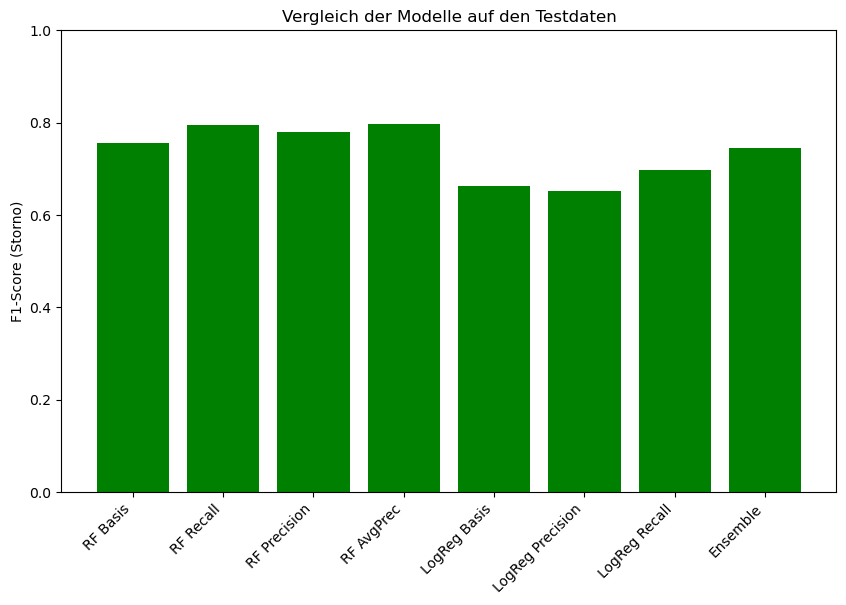

In [91]:
import matplotlib.pyplot as plt

f1_scores = [results[m]["f1-score"] for m in models.keys()]

plt.figure(figsize=(10,6))
plt.bar(results.keys(), f1_scores, color="green")
plt.ylabel("F1-Score (Storno)")
plt.title("Vergleich der Modelle auf den Testdaten")
plt.xticks(rotation=45, ha="right")
plt.ylim(0,1)
plt.show()


<a id="kapitel5" style="color:black"><h2>5. Fazit</h2></a> 

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Ziel der Arbeit war es, anhand von Machine-Learning-Methoden vorhersagen zu können, ob eine Hotelbuchung storniert wird oder nicht. 
Dazu wurden verschiedene Modelle getestet, darunter ein Random Forest, eine logistische Regression sowie eine Kombination beider Modelle in Form eines Ensembles. 
Die Ergebnisse zeigen deutlich, dass der Random Forest die besten Vorhersagen liefert und die logistische Regression in allen Varianten schwächer abschneidet. 
Das Ensemble konnte zwar solide Ergebnisse erreichen, blieb aber leicht hinter den besten Random-Forest-Modellen zurück.
</p>

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Besonders die auf Average Precision optimierte Variante des Random Forest erwies sich als stabiler Kompromiss zwischen Precision und Recall und erreichte sowohl einen hohen F1-Score als auch den besten ROC-AUC-Wert. 
Damit eignet sich dieses Modell am besten für den praktischen Einsatz, da es eine ausgewogene Balance zwischen möglichst wenigen Fehlalarmen und dem Erkennen von tatsächlichen Stornierungen bietet. 
</p>

<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Im wirtschaftlichen Kontext bedeutet ein hoher <i>Recall</i>, dass das Hotel lieber auf Nummer sicher geht und verdächtige Buchungen vorsorglich behandelt, zum Beispiel durch zusätzliche Kapazitätsreserven oder eine direkte Rückfrage beim Gast. Ein hoher <i>Precision</i>-Wert dagegen heißt, dass nur wenige Buchungen fälschlich als Storno eingestuft werden. Diese Strategie eignet sich für Hotels, die Fehlentscheidungen vermeiden wollen, um Gäste nicht durch unnötige Maßnahmen zu verunsichern. Dafür muss in Kauf genommen werden, dass manche Stornierungen erst später erkannt werden. Beide Ansätze tragen letztlich dazu bei, die Planungssicherheit des Hotels zu verbessern.
</p>


<p style="text-align: justify; line-height: 1.5; color: black; font-family: 'Times New Roman', Times, serif;">
Für die Zukunft könnte es sinnvoll sein, hybride Ansätze zu entwickeln, bei denen die Gewichtung von Precision und Recall dynamisch an die aktuelle Situation angepasst wird. 
So könnte in Hochsaisonzeiten ein höherer Recall bevorzugt werden, um möglichst keine Stornierung zu übersehen, während in schwächeren Phasen ein Fokus auf Precision sinnvoll ist, um Fehlalarme zu minimieren. Langfristig bietet sich auch der Einsatz von Deep-Learning-Methoden oder sequenziellen Modellen (z. B. RNNs) an, die zeitliche Muster besser erfassen können. 
</p>